<a href="https://colab.research.google.com/github/78furu/deeplea_adv/blob/master/deeplea_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/github_repos/deeplea_adv/'
%pwd
! git pull

import unet

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/github_repos/deeplea_adv
Already up to date.


In [33]:
# Import libraries
import numpy as np
from matplotlib import pyplot as plt

import torch
import torchvision
import preproc as pp
from models import Score
from collections import namedtuple
import pickle
import time

print(f"Pytorch version: {torch.__version__}")

# Set the runtime environment to GPU in: Edit -> Notebook settings or Runtime -> Change runtime type  
if torch.cuda.is_available() is False:
    raise Exception("GPU device not found, runtime environment should be set to GPU")
print(f"Using GPU device: {torch.cuda.get_device_name(torch.cuda.current_device())}")

# Seed random number generator
torch.manual_seed(0)
np.random.seed(0)

Pytorch version: 1.8.1+cu101
Using GPU device: Tesla T4


In [34]:
my_tuple = pp.generate_config_namedtuple(open(r'scorenet.yml'))
net = Score(my_tuple)
MODEL = net.to(torch.cuda.current_device())
MODEL.input_size=(my_tuple.data.channels,my_tuple.data.image_size,my_tuple.data.image_size)

length = 10
ratio = pow(0.01/10, 1/9)
start = 10
progression = np.array([start * ratio**i for i in range(length)])
epses = np.logspace(-5, -1, 9)

In [35]:
MODEL = Score(my_tuple)
MODEL = MODEL.to(torch.cuda.current_device())
MODEL.input_size=(my_tuple.data.channels,my_tuple.data.image_size,my_tuple.data.image_size)
MODEL.load_state_dict(torch.load("params/model_params_training_from_small_to_big_sigma_10.00_350_epoch_each.pt"))

<All keys matched successfully>

In [9]:
progression[1::-1]

array([ 4.64158883, 10.        ])

Dataset: mnist 
 Image shape: (1, 28, 28) 
 Number of train images: 60000 
 Number of test images: 10000 
 Number of classes: 10 



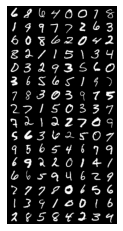

Model summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 14, 14]             544
         GroupNorm-2           [-1, 32, 14, 14]              64
               ELU-3           [-1, 32, 14, 14]               0
            Conv2d-4             [-1, 64, 7, 7]          32,832
         GroupNorm-5             [-1, 64, 7, 7]             128
               ELU-6             [-1, 64, 7, 7]               0
            Conv2d-7            [-1, 128, 3, 3]         204,928
         GroupNorm-8            [-1, 128, 3, 3]             256
               ELU-9            [-1, 128, 3, 3]               0
  ConvTranspose2d-10             [-1, 64, 7, 7]         204,864
        GroupNorm-11             [-1, 64, 7, 7]             128
              ELU-12             [-1, 64, 7, 7]               0
  ConvTranspose2d-13           [-1, 32, 14, 14]          32,800
        GroupNorm-14     

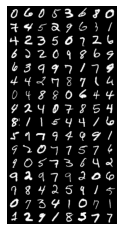

Model summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 14, 14]             544
         GroupNorm-2           [-1, 32, 14, 14]              64
               ELU-3           [-1, 32, 14, 14]               0
            Conv2d-4             [-1, 64, 7, 7]          32,832
         GroupNorm-5             [-1, 64, 7, 7]             128
               ELU-6             [-1, 64, 7, 7]               0
            Conv2d-7            [-1, 128, 3, 3]         204,928
         GroupNorm-8            [-1, 128, 3, 3]             256
               ELU-9            [-1, 128, 3, 3]               0
  ConvTranspose2d-10             [-1, 64, 7, 7]         204,864
        GroupNorm-11             [-1, 64, 7, 7]             128
              ELU-12             [-1, 64, 7, 7]               0
  ConvTranspose2d-13           [-1, 32, 14, 14]          32,800
        GroupNorm-14     

In [10]:
t = time.time()
DATASET_NAME = 'mnist'

# TODO
OPTIMIZER =  torch.optim.Adam(MODEL.parameters(), lr=1e-3)  
BATCH_SIZE = 128  
NUM_EPOCHS = 200
sigmas_ = progression[1::-1]
all_all_pics = {}

for sig in sigmas_:
    MODEL = Score(my_tuple)
    MODEL = MODEL.to(torch.cuda.current_device())
    MODEL.input_size=(my_tuple.data.channels,my_tuple.data.image_size,my_tuple.data.image_size)
    MODEL.load_state_dict(torch.load(f"params/separate_sigmas_trained_{sig:.2f}_100_epochs_more.pt"))
    OPTIMIZER =  torch.optim.Adam(MODEL.parameters(), lr=1e-3)  
    MODEL, loss_and_accuracy_history = pp.training_and_eval(DATASET_NAME, 
                                                                MODEL,
                                                                OPTIMIZER,
                                                                BATCH_SIZE, 
                                                                NUM_EPOCHS,
                                                                augment = False, 
                                                                need_summary = True,
                                                                sigma=sig)
    torch.save(MODEL.state_dict(), f"params/separate_sigmas_trained_{sig:.2f}_300_epochs_more.pt")

    print(f'\n\n\n#######################\nsig {sig} done in  {time.time()-t} secs \n\n')

Dataset: mnist 
 Image shape: (1, 28, 28) 
 Number of train images: 60000 
 Number of test images: 10000 
 Number of classes: 10 



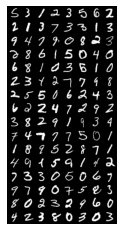

Model summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 14, 14]             544
         GroupNorm-2           [-1, 32, 14, 14]              64
               ELU-3           [-1, 32, 14, 14]               0
            Conv2d-4             [-1, 64, 7, 7]          32,832
         GroupNorm-5             [-1, 64, 7, 7]             128
               ELU-6             [-1, 64, 7, 7]               0
            Conv2d-7            [-1, 128, 3, 3]         204,928
         GroupNorm-8            [-1, 128, 3, 3]             256
               ELU-9            [-1, 128, 3, 3]               0
  ConvTranspose2d-10             [-1, 64, 7, 7]         204,864
        GroupNorm-11             [-1, 64, 7, 7]             128
              ELU-12             [-1, 64, 7, 7]               0
  ConvTranspose2d-13           [-1, 32, 14, 14]          32,800
        GroupNorm-14     

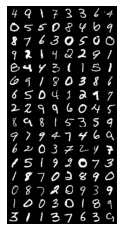

Model summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 14, 14]             544
         GroupNorm-2           [-1, 32, 14, 14]              64
               ELU-3           [-1, 32, 14, 14]               0
            Conv2d-4             [-1, 64, 7, 7]          32,832
         GroupNorm-5             [-1, 64, 7, 7]             128
               ELU-6             [-1, 64, 7, 7]               0
            Conv2d-7            [-1, 128, 3, 3]         204,928
         GroupNorm-8            [-1, 128, 3, 3]             256
               ELU-9            [-1, 128, 3, 3]               0
  ConvTranspose2d-10             [-1, 64, 7, 7]         204,864
        GroupNorm-11             [-1, 64, 7, 7]             128
              ELU-12             [-1, 64, 7, 7]               0
  ConvTranspose2d-13           [-1, 32, 14, 14]          32,800
        GroupNorm-14     

In [ ]:
,0 = time.time()
DATASET_NAME = 'mnist'

# TODO
OPTIMIZER =  torch.optim.Adam(MODEL.parameters(), lr=1e-3)  
BATCH_SIZE = 128  
NUM_EPOCHS = 300
sigmas_ = progression[::-1]
all_all_pics = {}

for sig in sigmas_:
    MODEL, loss_and_accuracy_history = pp.training_and_eval(DATASET_NAME, 
                                                                MODEL,
                                                                OPTIMIZER,
                                                                BATCH_SIZE, 
                                                                NUM_EPOCHS,
                                                                augment = False, 
                                                                need_summary = True,
                                                                sigma=sig)
    all_pics = pp.annealed_langevin(MODEL, progression, T = 100)
    all_all_pics[sig] = all_pics
    pickle.dump(all_all_pics, open("all_all_pics_from_small_to_big_450ep.p", "wb"))
    torch.save(MODEL.state_dict(), f"model_params_training_from_small_to_big_sigma_{sig:.2f}_450_epoch_each.pt")

    print(f'\n\n\n#######################\nsig {sig} done in  {time.time()-t} secs \n\n')

In [ ]:
#torch.save(MODEL.state_dict(), "model_params_2_all_trained_for210_epochs.pt")

In [ ]:
all_all_pics = pickle.load(open("all_all_pics_from_small_to_big_150ep.p", 'rb'))

In [ ]:
c = -1
all_pics = all_all_pics[progression[c]]


for k, v in all_all_pics.items():
    all_pics.append(v[2])

AttributeError: ignored

In [ ]:

all_all_pics.keys()

dict_keys([10.0, 4.641588833612779, 2.154434690031884, 1.0000000000000002, 0.46415888336127803, 0.21544346900318842, 0.10000000000000003, 0.04641588833612781, 0.021544346900318846, 0.010000000000000007])

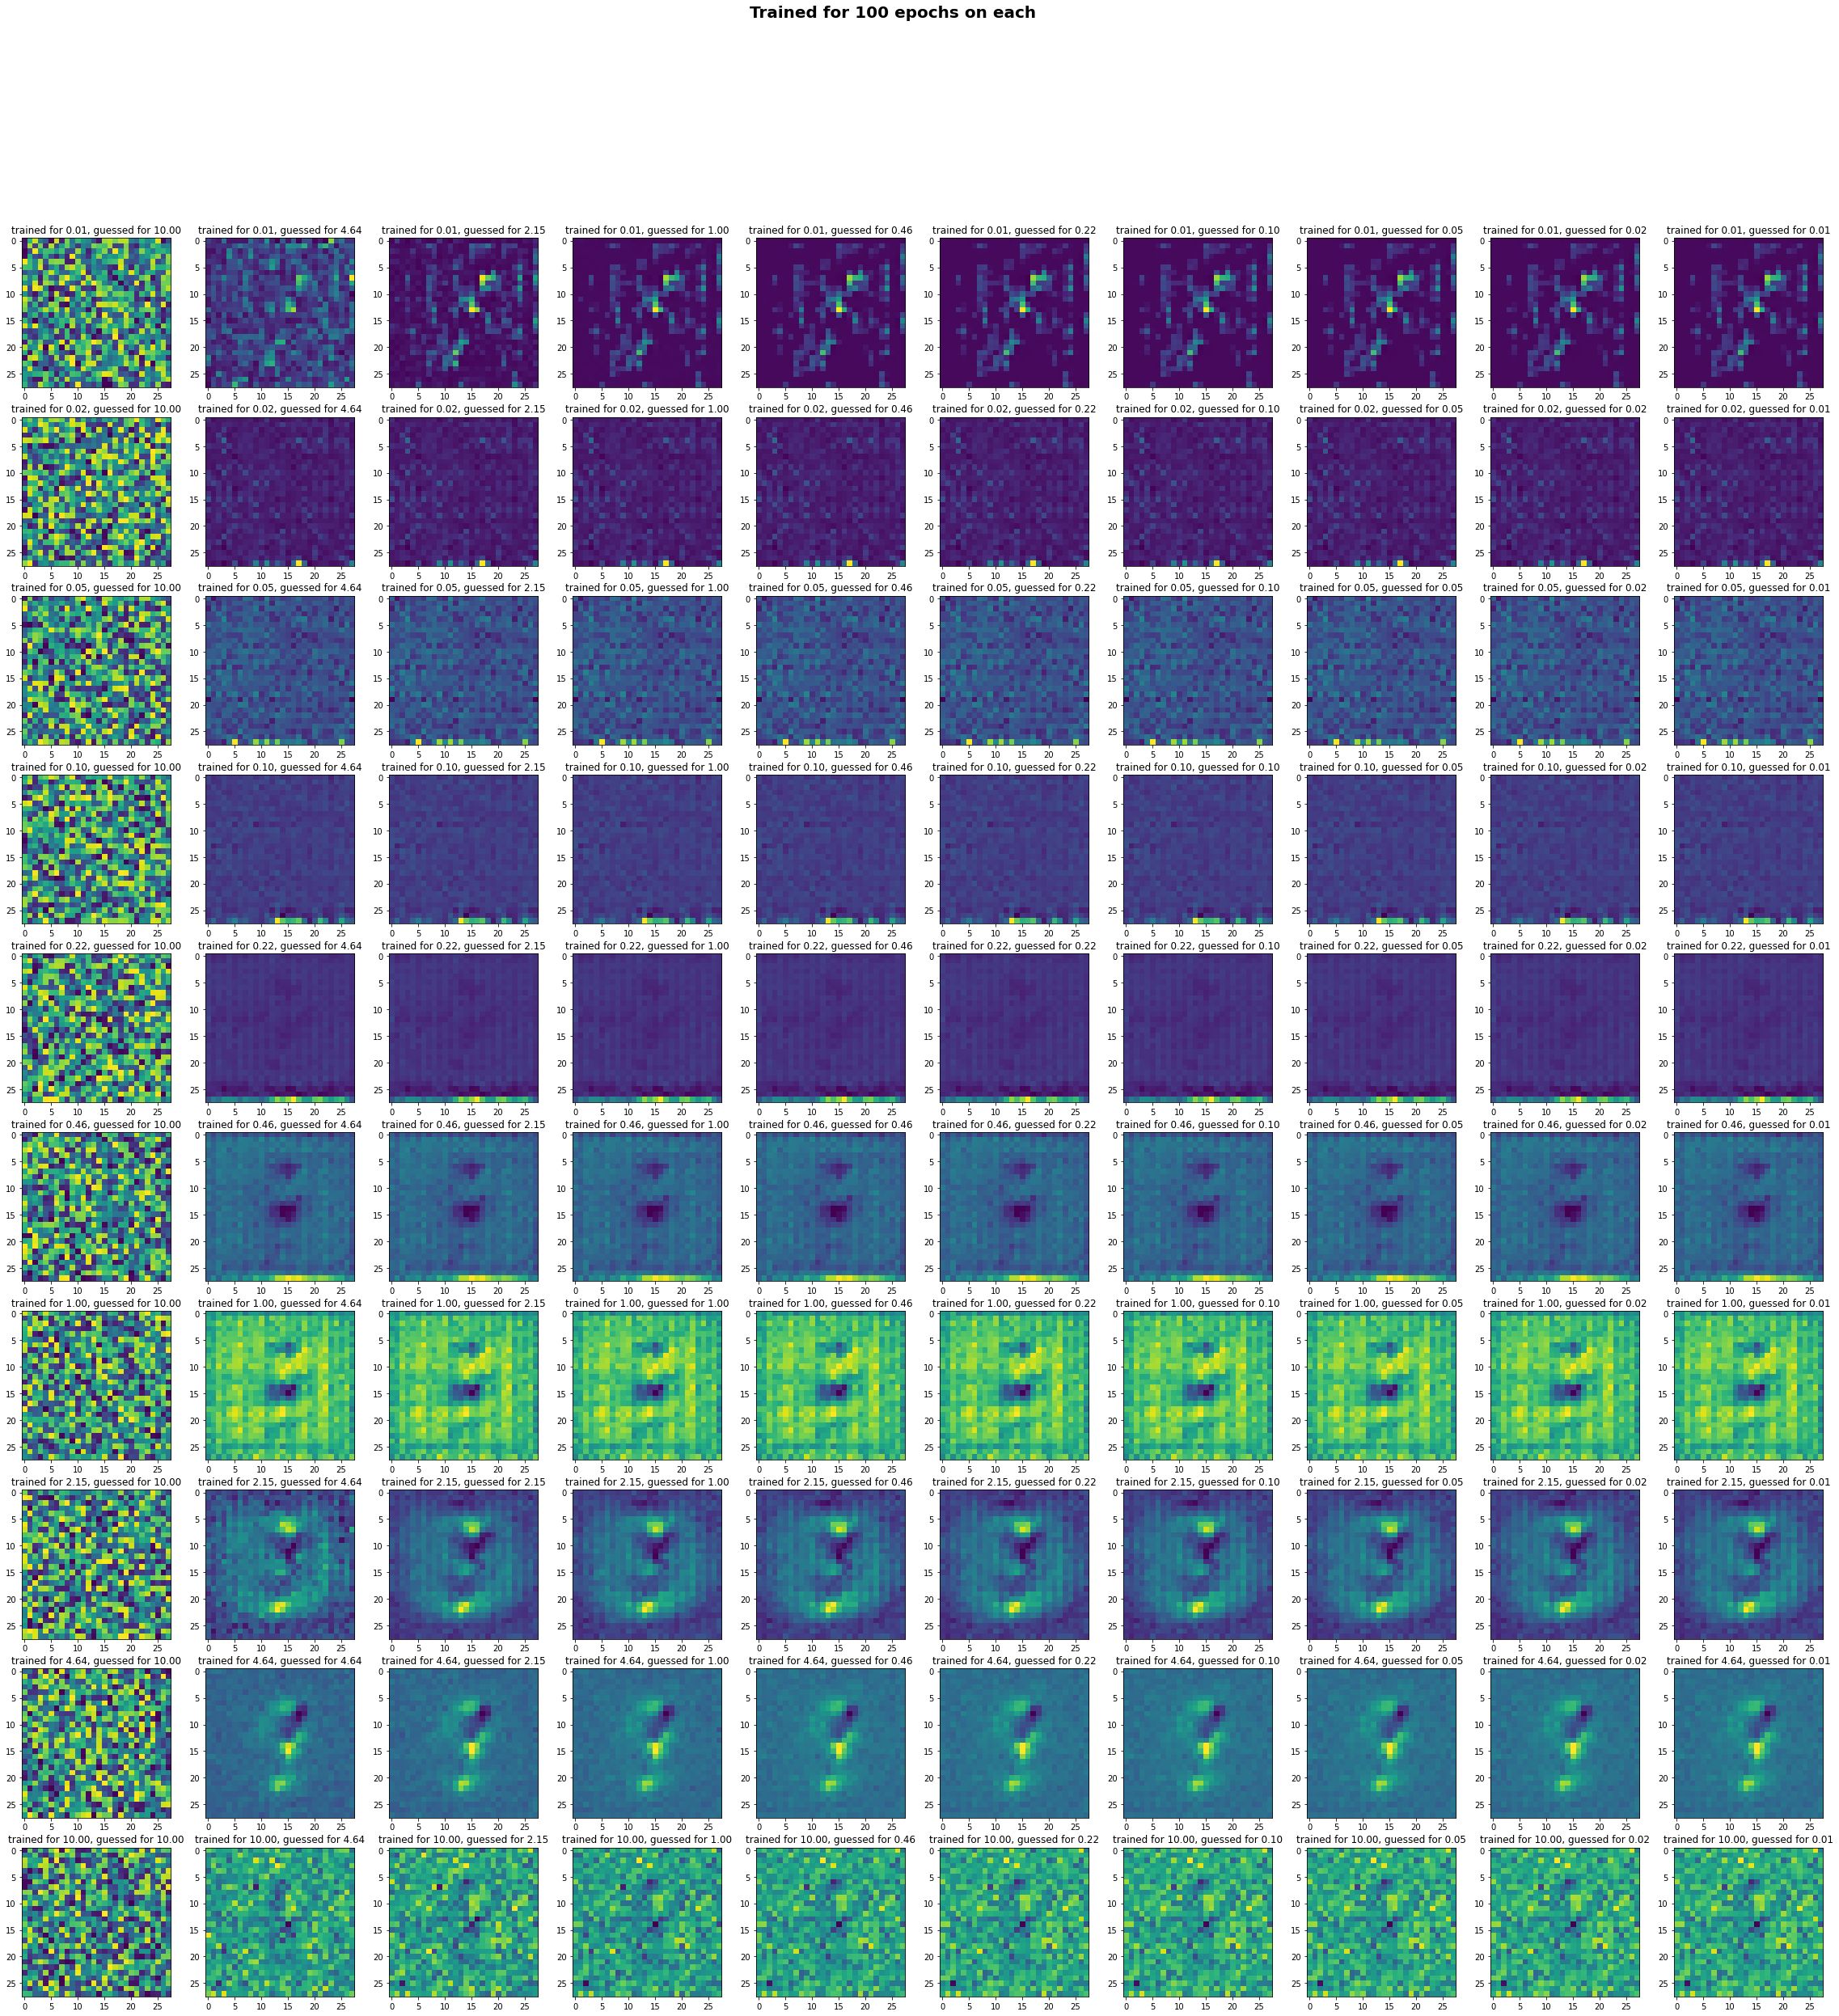

In [ ]:
fig, axes = plt.subplots(10,10, figsize=(40, 40))


for r, s_tr  in enumerate(progression[::-1]):
    MODEL = Score(my_tuple)
    MODEL = MODEL.to(torch.cuda.current_device())
    MODEL.input_size=(my_tuple.data.channels,my_tuple.data.image_size,my_tuple.data.image_size)
    MODEL.load_state_dict(torch.load(f"model_params_training_from_small_to_big_sigma_{s_tr:.2f}_150_epoch_each.pt"))
    all_pics = pp.annealed_langevin(MODEL, progression, T = 100, return_all=True)
    for c, s_gu in enumerate(progression):
        ax = axes[r,c]
        im = all_pics[c]
        ax.imshow(im)
        ax.set_title(f"trained for {s_tr:.2f}, guessed for {s_gu:.2f}")
fig.suptitle("Trained for 100 epochs on each", fontsize=20, fontweight = 'bold')
fig.savefig('trained_on_all_from_small_to_big_for_150_epochs.png', dpi = 100)

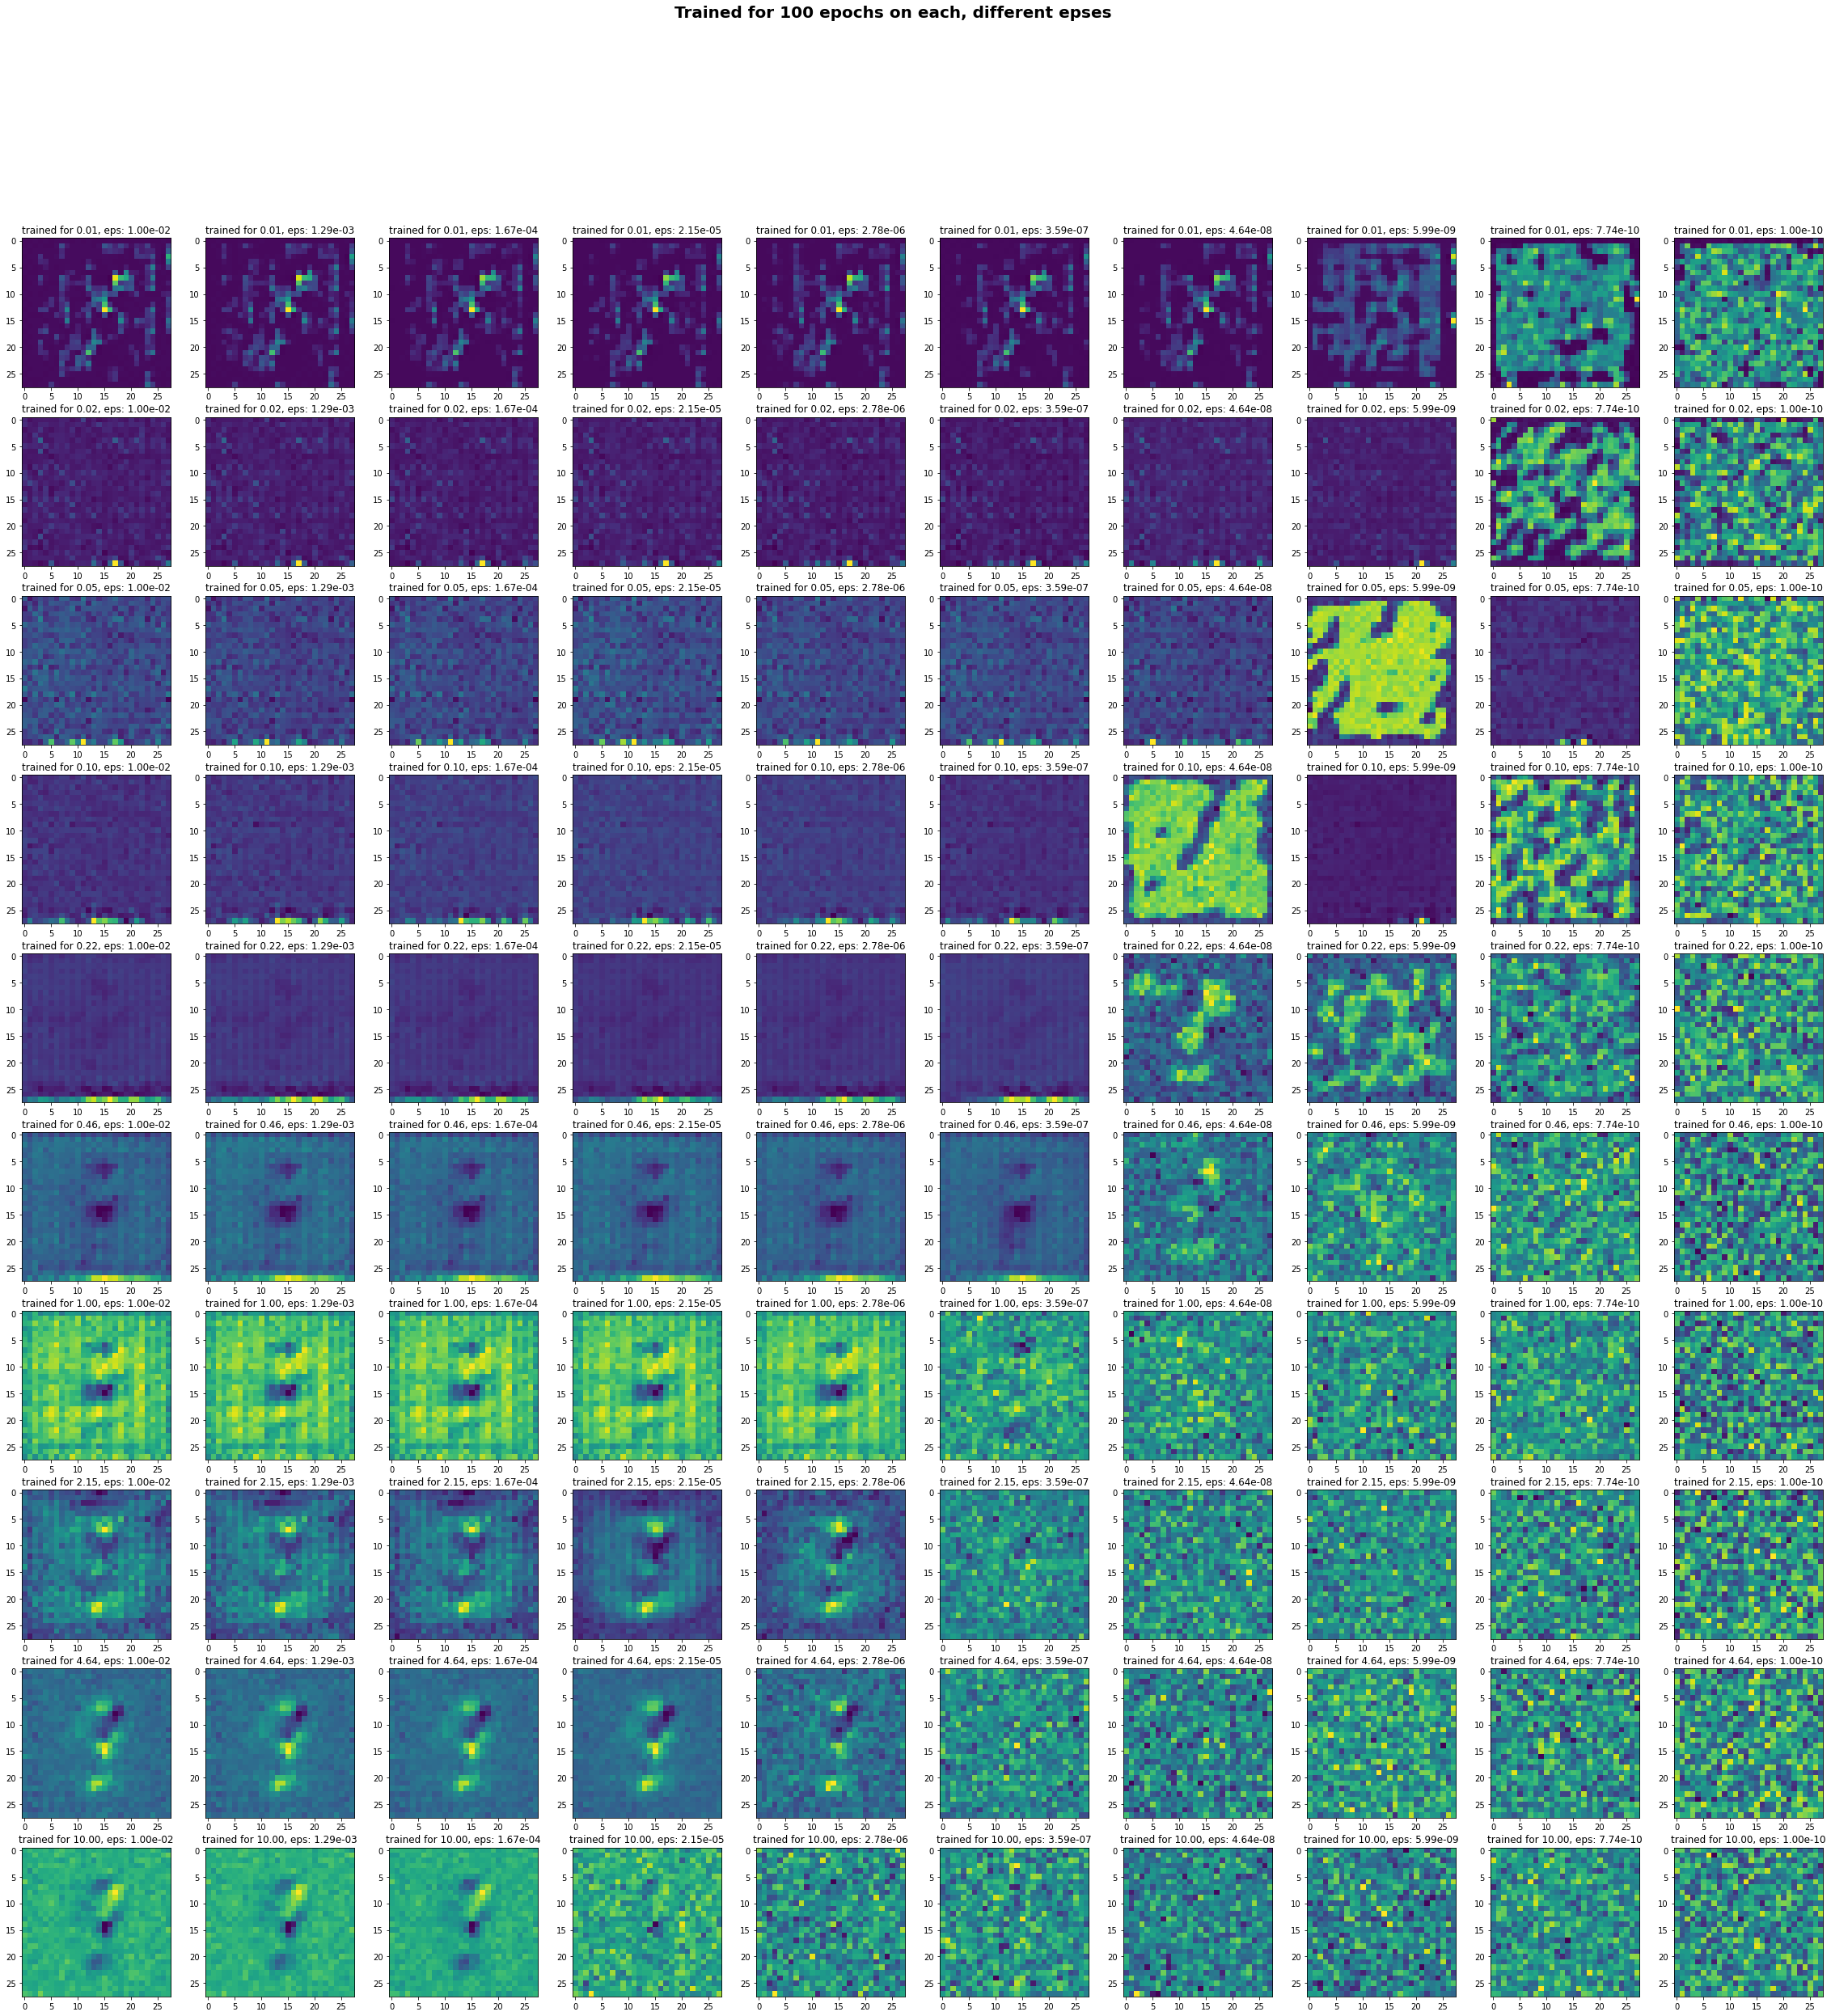

In [ ]:
fig, axes = plt.subplots(10,10, figsize=(40, 40))


for r, s_tr  in enumerate(progression[::-1]):
    MODEL = Score(my_tuple)
    MODEL = MODEL.to(torch.cuda.current_device())
    MODEL.input_size=(my_tuple.data.channels,my_tuple.data.image_size,my_tuple.data.image_size)
    MODEL.load_state_dict(torch.load(f"model_params_training_from_small_to_big_sigma_{s_tr:.2f}_150_epoch_each.pt"))
    for c, ep in enumerate(np.logspace(-2, -10, 10)):
        all_pics = pp.annealed_langevin(MODEL, progression, T = 100, eps= ep, return_all=True)
        ax = axes[r,c]
        im = all_pics[-1]
        ax.imshow(im)
        ax.set_title(f"trained for {s_tr:.2f}, eps: {ep:.2e}")
fig.suptitle("Trained for 100 epochs on each, different epses", fontsize=20, fontweight = 'bold')
fig.savefig('trained_on_all_from_small_to_big_for_150_epochs_different_epsilons.png', dpi = 100)

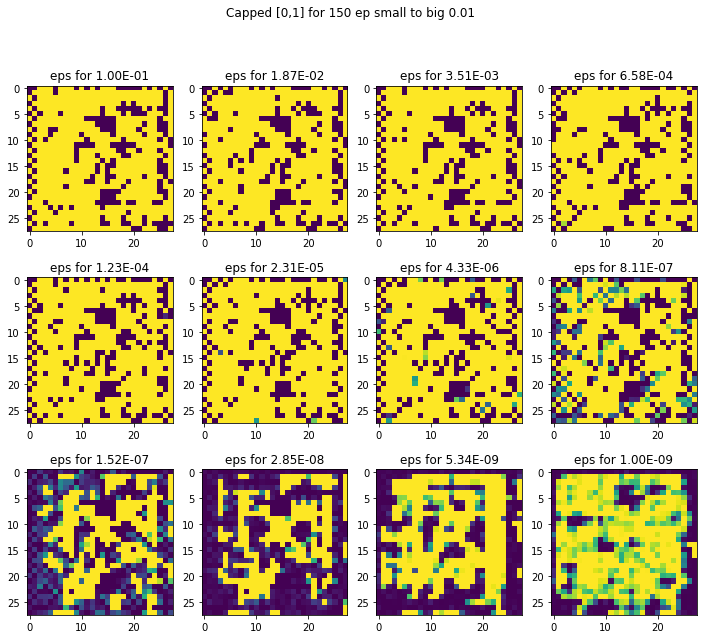

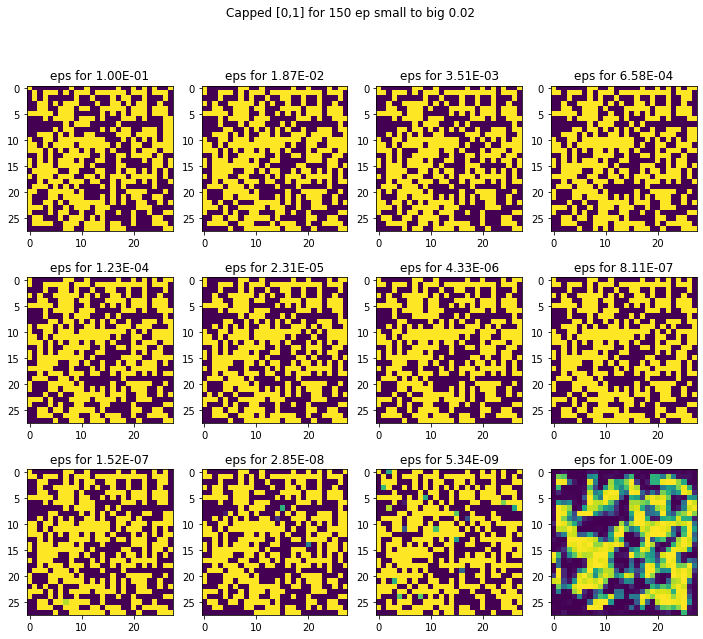

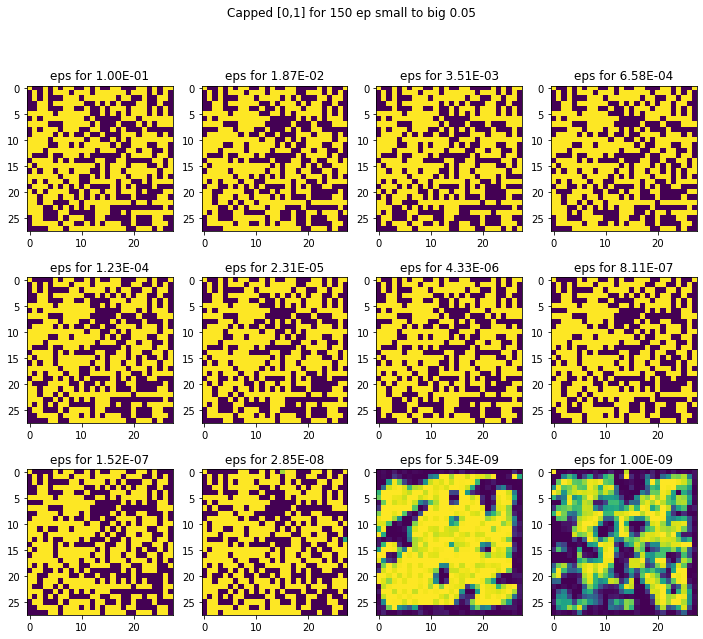

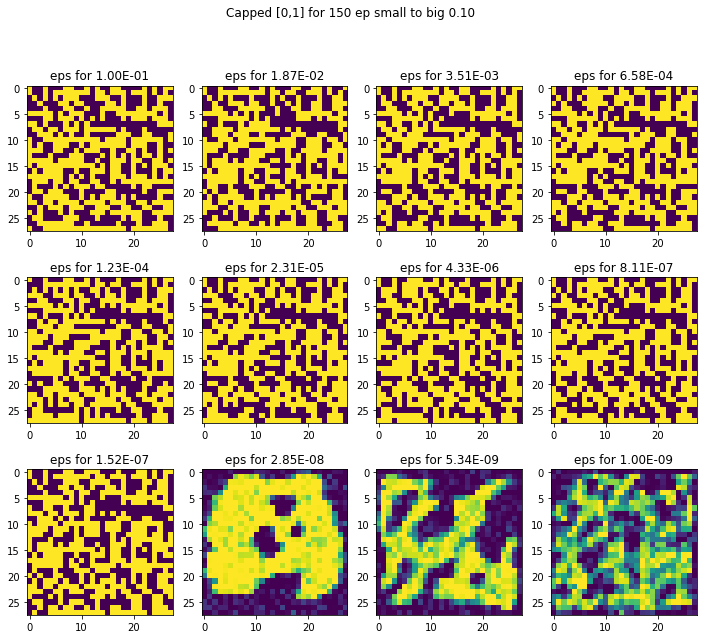

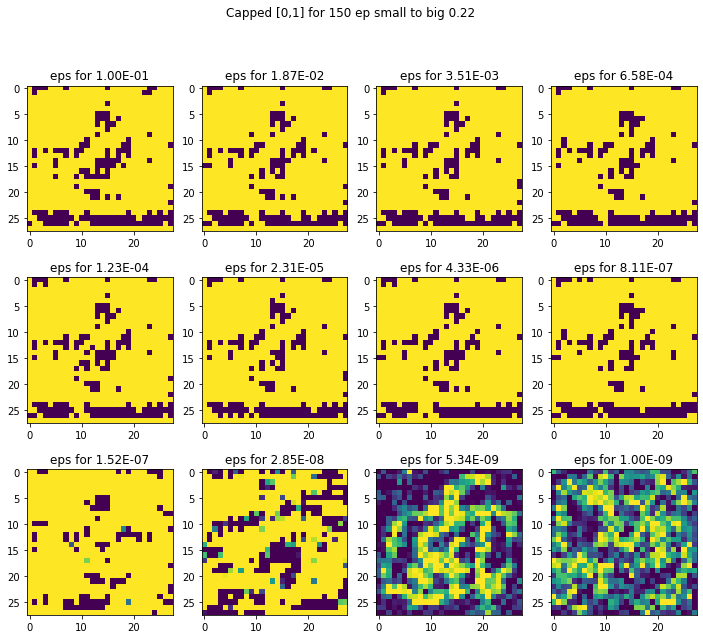

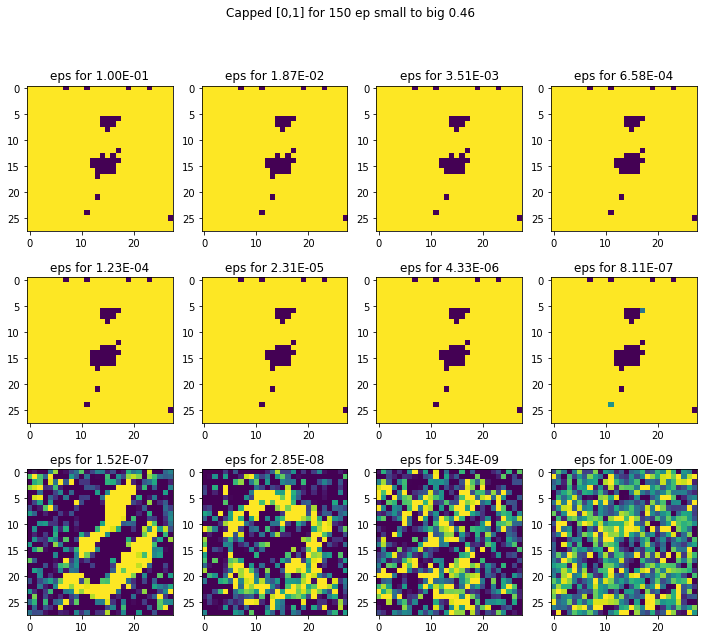

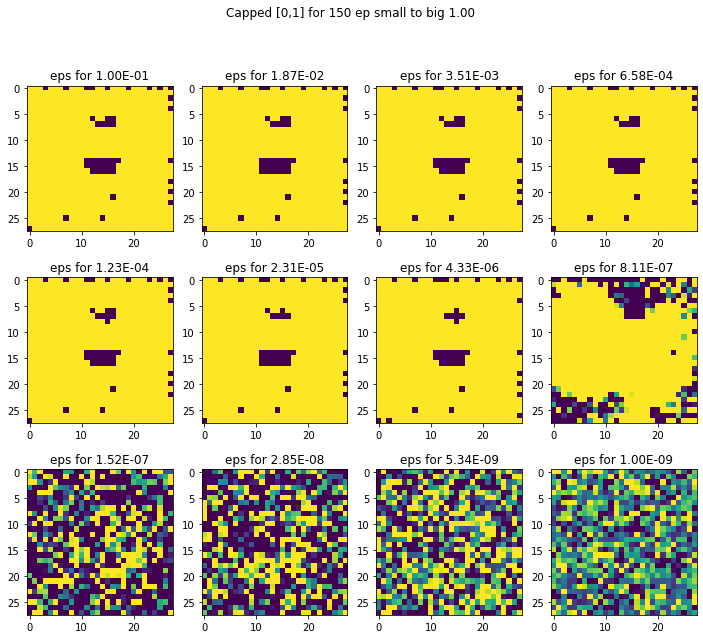

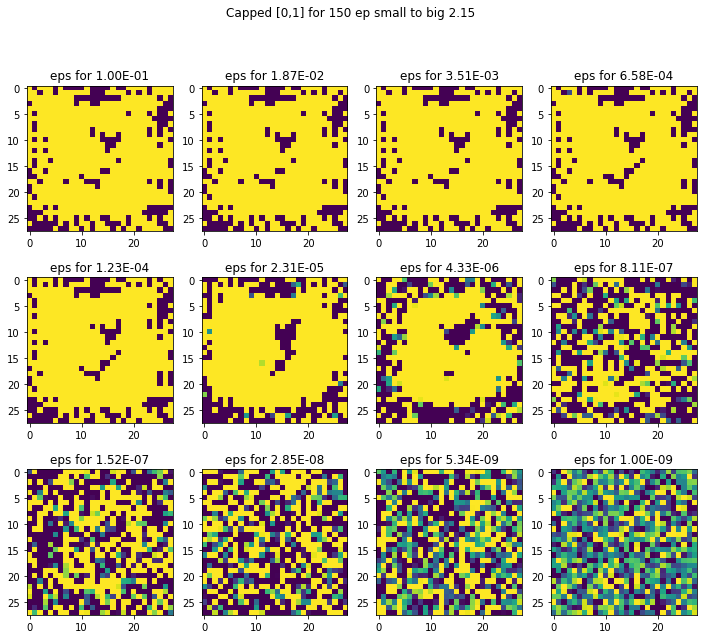

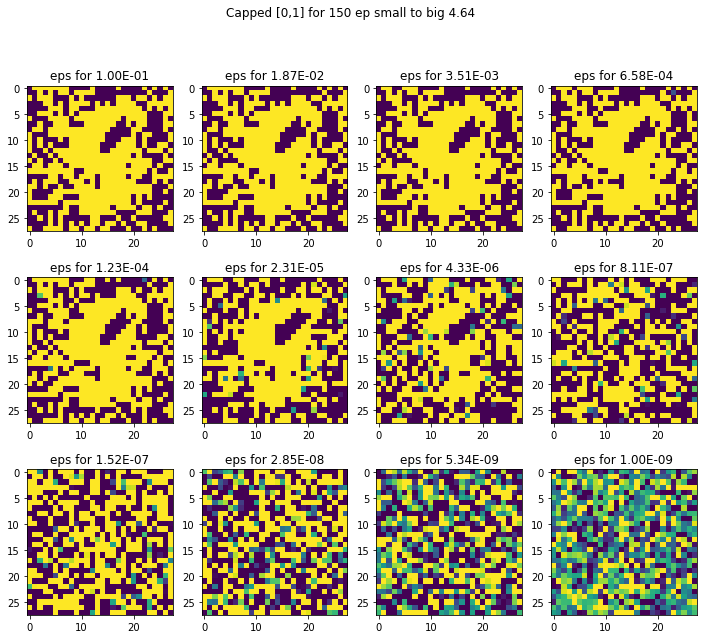

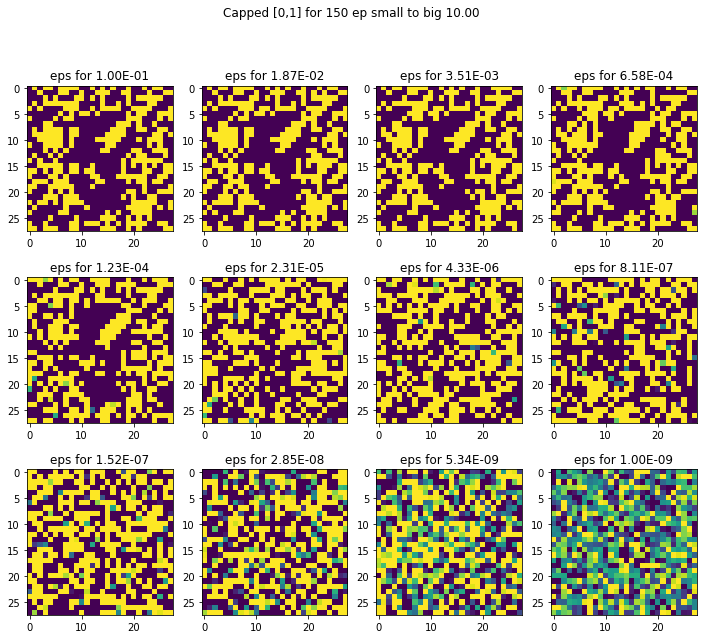

In [ ]:

for s in progression[::-1]:
    MODEL = Score(my_tuple)
    MODEL = MODEL.to(torch.cuda.current_device())
    MODEL.input_size=(my_tuple.data.channels,my_tuple.data.image_size,my_tuple.data.image_size)
    MODEL.load_state_dict(torch.load(f"model_params_training_from_small_to_big_sigma_{s:.2f}_150_epoch_each.pt"))
    fig, axes = plt.subplots(3,4, figsize=(12, 10))

    #all_pics = pp.annealed_langevin(MODEL, progression, eps = 2e-9, T = 100, return_all=True)
    for c, (ep, ax) in enumerate(zip(np.logspace(-1, -9, 12),  axes.ravel())):
        all_pics = pp.annealed_langevin(MODEL, progression, eps = ep, T = 100, return_all=True)
        im = all_pics[-1]
        ax.imshow(im, vmin = 0, vmax = 1)
        ax.set_title(f"eps for {ep:.2E}")
    fig.suptitle(f"Capped [0,1] for 150 ep small to big {s:.2f}")
    fig.savefig(f'different_epses_capped_for_150_epochs_sigma_{s:.2f}.png', dpi = 150)

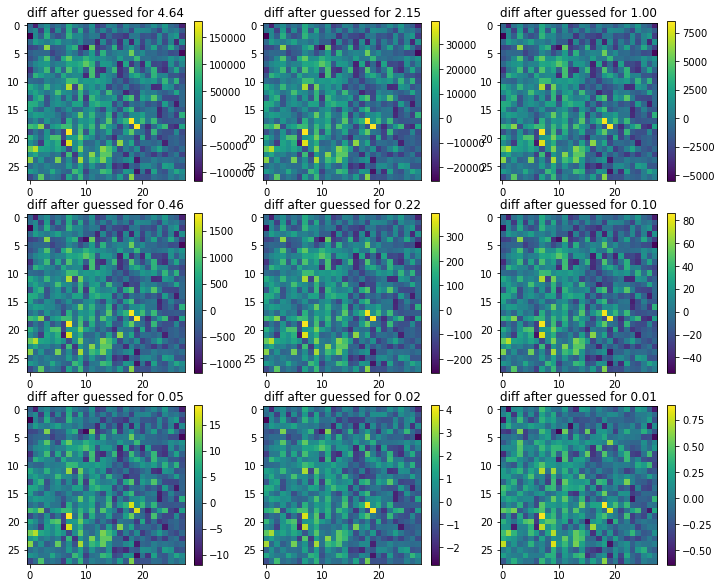

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(12, 10))

for c, (s_gu, ax) in enumerate(zip(progression[1:],  axes.ravel())):
    im = all_pics[c+1] - all_pics[c]
    f = ax.imshow(im)
    ax.set_title(f"diff after guessed for {s_gu:.2f}")
    fig.colorbar(f, ax = ax)

In [ ]:
all_all_pics = [pp.annealed_langevin(MODEL, progression, T = 100, return_all=True) for _ in range(9)]


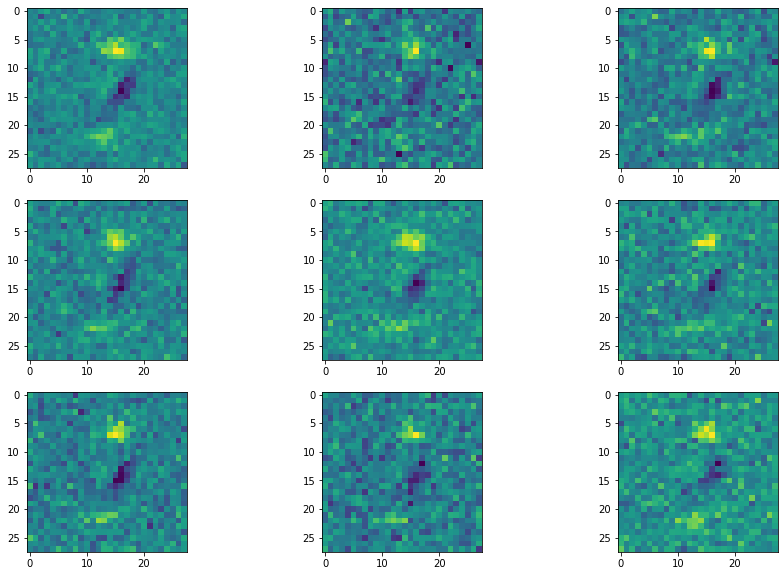

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(15, 10), facecolor='white')

for ax, pics in zip(axes.ravel(), all_all_pics):
    ax.imshow(pics[-1])

In [36]:
def annealed_langevin(model, sigmas, eps = 2e-5, T = 10,return_all = False):
    x_0 = torch.rand(1,1, 28, 28).to("cuda")
    alls = [x_0[0][0].cpu().detach().numpy().copy()]
    for sigma in sigmas:
        MODEL = Score(my_tuple)
        MODEL = MODEL.to(torch.cuda.current_device())
        MODEL.input_size=(my_tuple.data.channels,my_tuple.data.image_size,my_tuple.data.image_size)
        MODEL.load_state_dict(torch.load(f"params/separate_sigmas_trained_{sigma:.2f}_300_epochs_more.pt"))
        alpha = eps*sigma**2/sigmas[-1]**2
        for t in range(T):
            z = torch.normal(0, 1, size = x_0.shape).to("cuda")
            x_0 += alpha/2 * MODEL(x_0) +  np.sqrt(alpha)*z
        alls.append(x_0[0][0].cpu().detach().numpy().copy())
    return alls if return_all else x_0

In [37]:
all_all_pics = [annealed_langevin(MODEL, progression, T = 100, return_all=True) for _ in range(36)]


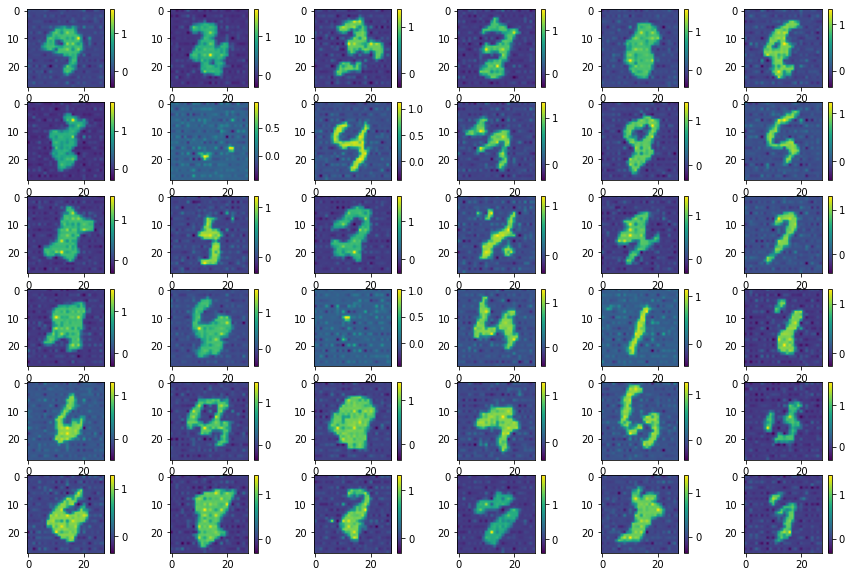

In [38]:
fig, axes = plt.subplots(6,6, figsize=(15, 10), facecolor='white')

for ax, pics in zip(axes.ravel(), all_all_pics):
    f =  ax.imshow(pics[-1])
    fig.colorbar(f, ax = ax)
fig.savefig("figs/separate_models_400_epochs_each_36.png", dpi = 100)

In [ ]:
!git commit -m "created separate models for sep sigmas"

[master 48d9059] created separate models for sep sigmas
 12 files changed, 1 insertion(+), 2 deletions(-)
 create mode 100644 params/separate_sigmas_trained_0.01.pt
 create mode 100644 params/separate_sigmas_trained_0.02.pt
 create mode 100644 params/separate_sigmas_trained_0.05.pt
 create mode 100644 params/separate_sigmas_trained_0.10.pt
 create mode 100644 params/separate_sigmas_trained_0.22.pt
 create mode 100644 params/separate_sigmas_trained_0.46.pt
 create mode 100644 params/separate_sigmas_trained_1.00.pt
 create mode 100644 params/separate_sigmas_trained_10.00.pt
 create mode 100644 params/separate_sigmas_trained_2.15.pt
 create mode 100644 params/separate_sigmas_trained_4.64.pt


In [ ]:
! git config --global user.email "78furu@gmail.com"
! git config --global user.name "Kristof Furuglyas"

In [ ]:
!git push

Counting objects: 16, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (16/16), done.
Writing objects: 100% (16/16), 74.02 MiB | 12.97 MiB/s, done.
Total 16 (delta 5), reused 0 (delta 0)
remote: Resolving deltas: 100% (5/5), completed with 5 local objects.
To https://github.com/78furu/deeplea_adv.git
   70843f7..48d9059  master -> master


## Data loading

In [ ]:
train, test = pp.load_and_preprocess_data("mnist", BATCH_SIZE)

NameError: ignored

In [ ]:
outp = MODEL((train.dataset.data[:32].view(32, 1, 28, 28)/255).to("cuda"))

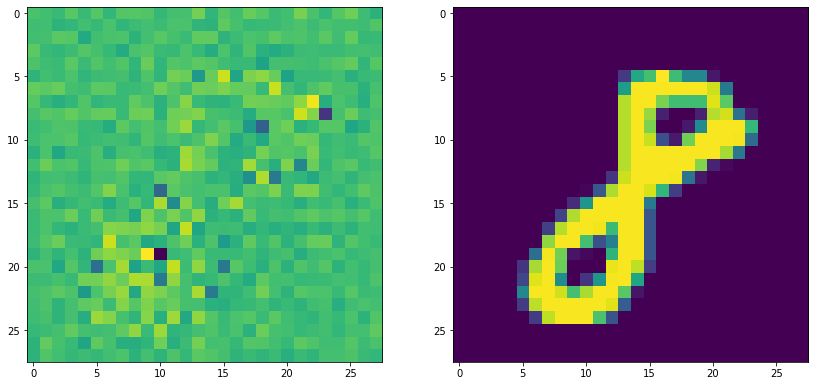

In [ ]:
c = 31
image = outp[c].detach().cpu().numpy().astype(float)

fig, axes = plt.subplots(1,2, figsize=(14, 8))

ax = axes[0]
#ax.imshow(np.moveaxis(image, [0,1,2], [2,0,1]))
ax.imshow(image[0])
ax = axes[1]
ax.imshow(train.dataset.data[c])

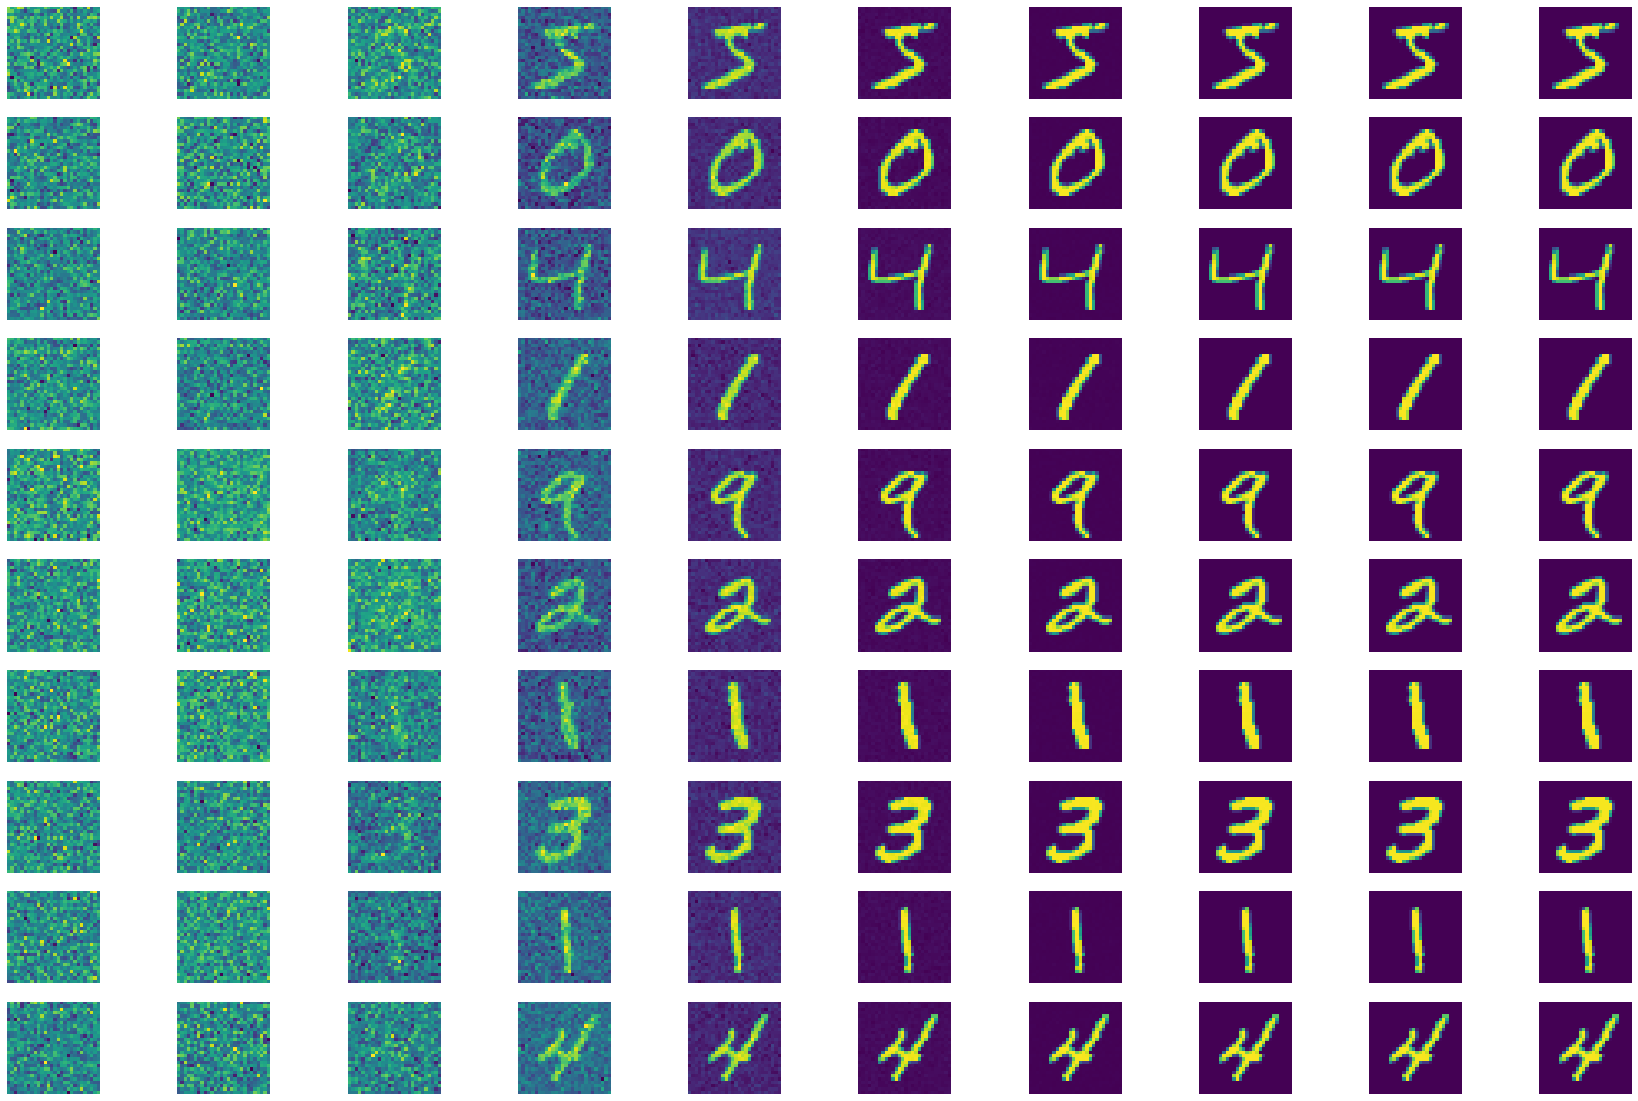

In [ ]:


fig, axes = plt.subplots(num_of_images,progression.shape[0], figsize=(30, 20))
for im,c in zip(train.dataset.data, range(num_of_images)):
    for eps, ax in zip(progression, axes[c, :]):
        eps = (eps**2/progression[-1]**2)*2e-5
        im_ = im/255 + np.random.normal(scale=eps,size=im.shape)
        #im_ = (im_-np.min(im_))/(np.max(im_)-np.min(im_))
        ax.imshow(im_);
        ax.axis('off')

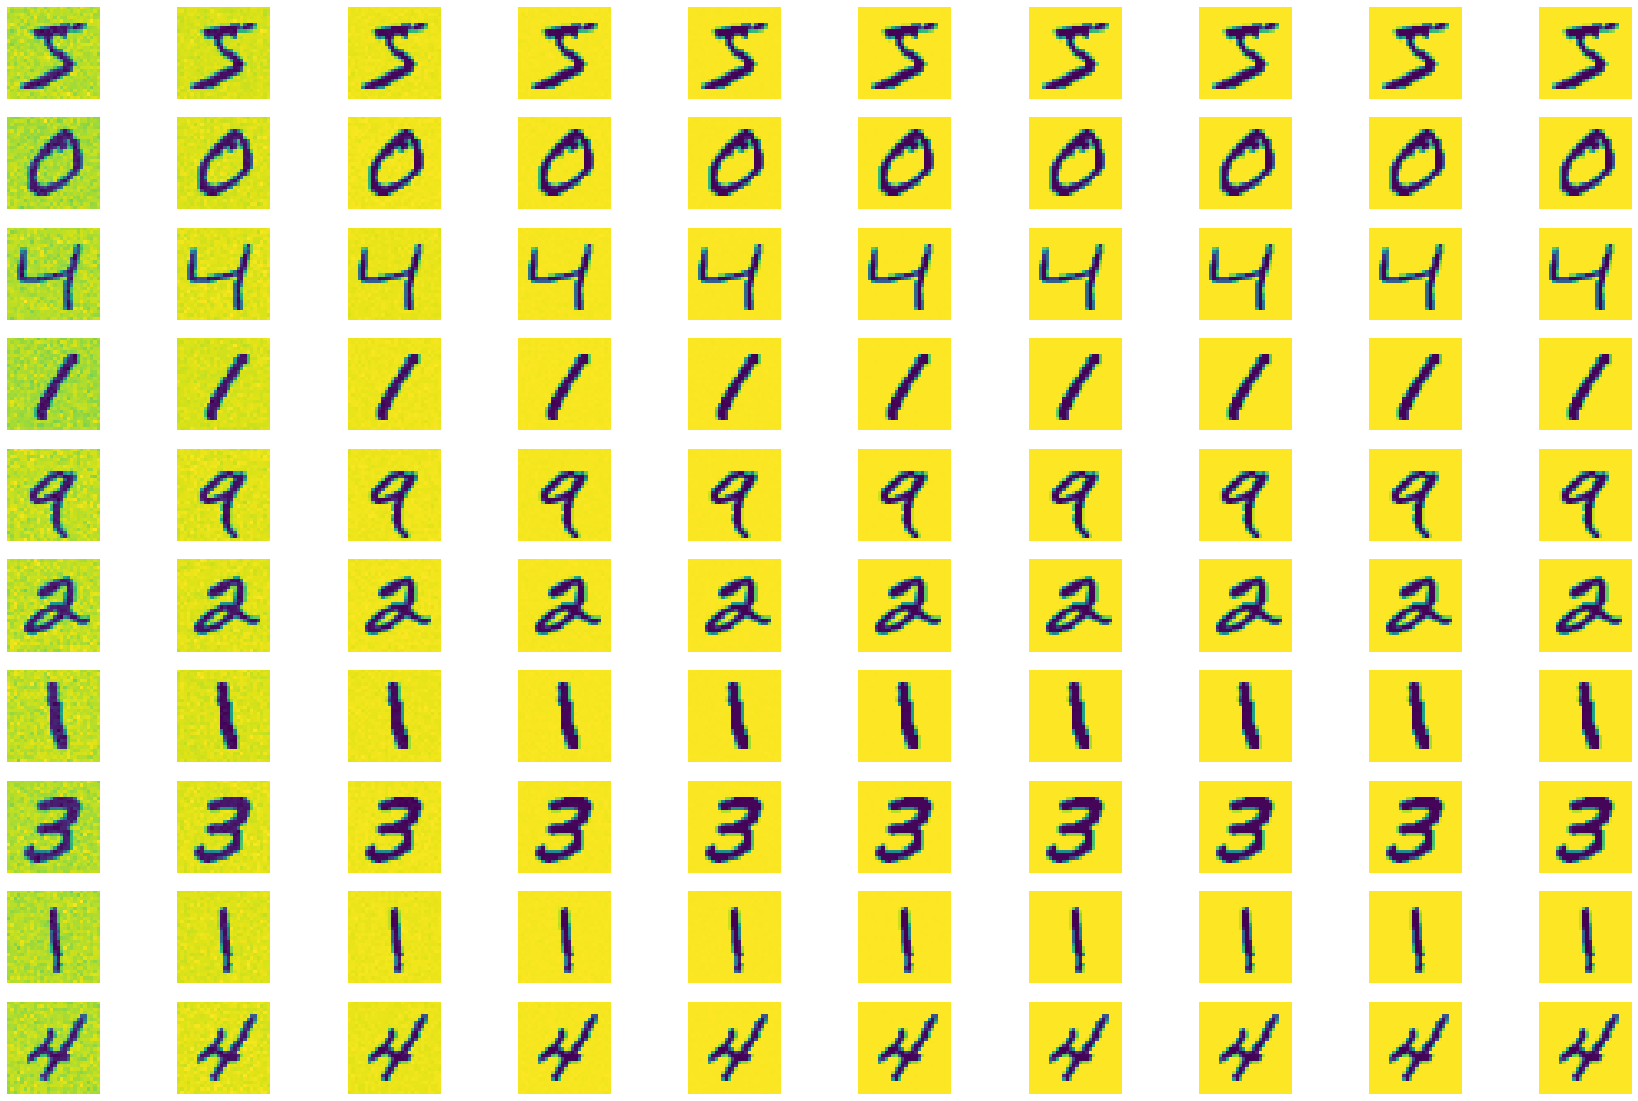

In [ ]:
fig, axes = plt.subplots(num_of_images,progression.shape[0], figsize=(30, 20))
for im,c in zip(train.dataset.data, range(num_of_images)):
    for eps, ax in zip(progression, axes[c, :]):
        eps_ = (eps**2/progression[-1]**2)*2e-5
        im_ = im/255 + np.random.normal(scale=eps,size=im.shape)
        #im_ = (im_-np.min(im_))/(np.max(im_)-np.min(im_))
        ax.imshow((im_-im)/eps);
        ax.axis('off')

In [ ]:
device = torch.cuda.current_device()
for sigma in epses:

    for i, (images, labels) in enumerate(train):
        images_o = images.to(device)
        #eps_ = (eps**2/progression[-1]**2)*2e-5
        images = images_o + torch.normal(0, std=sigma, size=images.shape).to(device)
        labels = (images-images_o)/sigma

KeyboardInterrupt: ignored

In [ ]:
gen_images = [annealed_langevin(MODEL,progression,e, 100)[0][0].cpu().detach().numpy() for e in epsilons]
#gen_images = [annealed_langevin(MODEL,progression,epsilons[-1], t)[0][0].cpu().detach().numpy() for t in t_s]

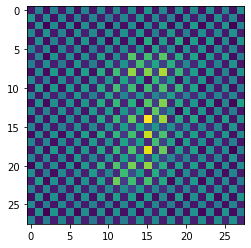

In [ ]:
c = annealed_langevin(loaded_model,progression,2e-5, 100)
plt.imshow(c[0][0].cpu().detach().numpy())

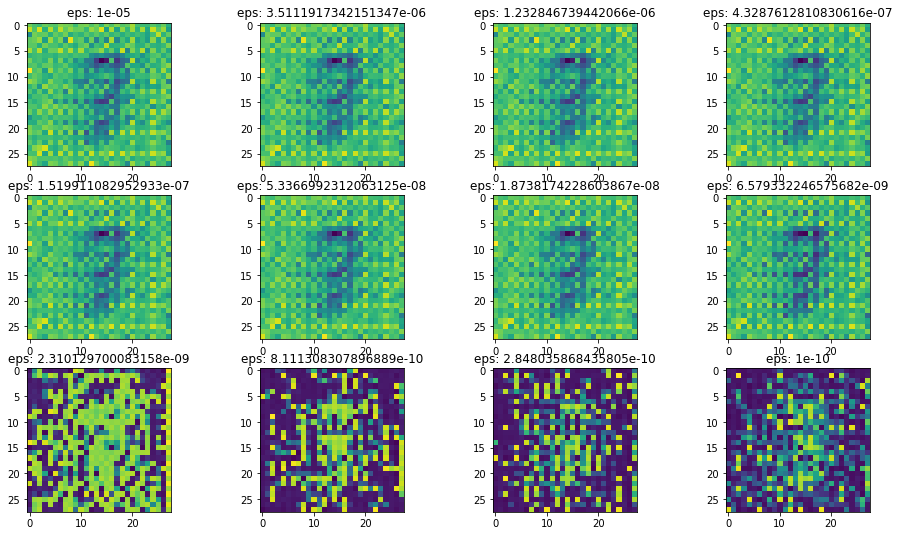

In [ ]:
fig, axes = plt.subplots(3,4, figsize = (16,9))

for im, ax, ep in zip(gen_images, axes.ravel(), epsilons):
    ax.imshow(im)
    ax.set_title(f"eps: {ep}")

fig.savefig('figs/different_epses_appr_310_epochs_for_allsigmas_plus_10sigma.png', dpi = 100)

In [ ]:
progression

array([10.        ,  4.64158883,  2.15443469,  1.        ,  0.46415888,
        0.21544347,  0.1       ,  0.04641589,  0.02154435,  0.01      ])

In [ ]:
    torch.cuda.empty_cache()

In [ ]:
# torch.save(MODEL.state_dict(), "model_params_2_all_trained_for160_epochs.pt")

In [ ]:
"""MODEL = Score(my_tuple)
MODEL = MODEL.to(torch.cuda.current_device())
MODEL.input_size=(my_tuple.data.channels,my_tuple.data.image_size,my_tuple.data.image_size)
MODEL.load_state_dict(torch.load("model_params_2_all_trained_for310_epochs_sig10_added.pt"))
""";

In [ ]:

!git push

Counting objects: 3, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 813 bytes | 406.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/78furu/deeplea_adv.git
   2efd67a..79628d9  master -> master


In [ ]:
!git commit -m "done for from big to small"

[master ac23d38] done for from big to small
 14 files changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 all_all_pics_from_big_to_small.p
 create mode 100644 model_params_training_from_big_to_small_sigma_0.01_50_epoch_each.pt
 create mode 100644 model_params_training_from_big_to_small_sigma_0.02_50_epoch_each.pt
 create mode 100644 model_params_training_from_big_to_small_sigma_0.05_50_epoch_each.pt
 create mode 100644 model_params_training_from_big_to_small_sigma_0.10_50_epoch_each.pt
 create mode 100644 model_params_training_from_big_to_small_sigma_0.22_50_epoch_each.pt
 create mode 100644 model_params_training_from_big_to_small_sigma_0.46_50_epoch_each.pt
 create mode 100644 model_params_training_from_big_to_small_sigma_1.00_50_epoch_each.pt
 create mode 100644 model_params_training_from_big_to_small_sigma_10.00_50_epoch_each.pt
 create mode 100644 model_params_training_from_big_to_small_sigma_2.15_50_epoch_each.pt
 create mode 100644 model_params_training_from_big_to_small

In [ ]:
!git config --global user.email "78furu@gmail.com"
!git config --global user.name "Furuglyas Kristof"


In [ ]:
!git push

Counting objects: 17, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (17/17), done.
Writing objects: 100% (17/17), 74.81 MiB | 14.78 MiB/s, done.
Total 17 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/78furu/deeplea_adv.git
   e3c0105..ac23d38  master -> master


# Guessing 

In [3]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [4]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /files/MNIST/raw/train-images-idx3-ubyte.gz to /files/MNIST/raw




Extracting /files/MNIST/raw/train-labels-idx1-ubyte.gz to /files/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /files/MNIST/raw/t10k-images-idx3-ubyte.gz to /files/MNIST/raw




Extracting /files/MNIST/raw/t10k-labels-idx1-ubyte.gz to /files/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

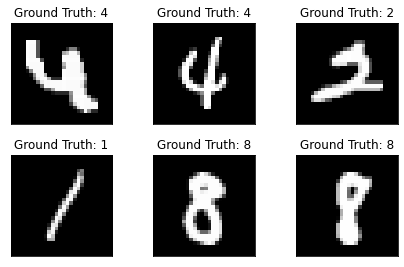

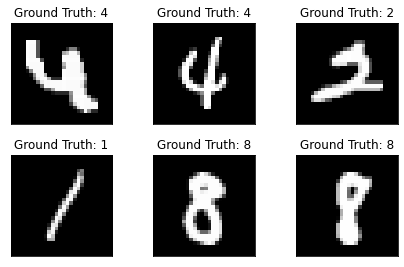

In [6]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [7]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [9]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [10]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [16]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      #torch.save(network.state_dict(), '/results/model.pth')
      #torch.save(optimizer.state_dict(), '/results/optimizer.pth')


def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [17]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3062, Accuracy: 623/10000 (6%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.363591
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.284745
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.281145
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.293013
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.247085
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.248564
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.230352
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.201318
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.135957
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.128092
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.038588
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.976248
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.886605
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.621064
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.607517
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.549100
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.314747
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.135618
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.219240
Train Epoch: 1 [12160/6

In [22]:
list(test_counter)

[0, 60000, 120000, 180000]

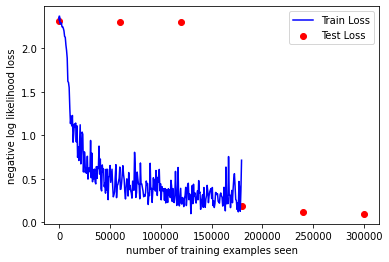

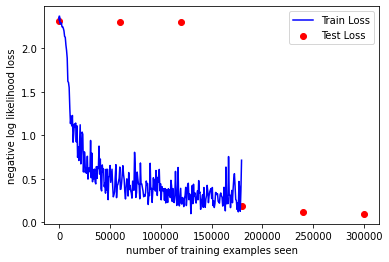

In [27]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter + [240000, 300000], test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

In [ ]:
ap

In [43]:
demo = np.array([p[-1] for p in all_all_pics])

In [51]:

demo_  = torch.FloatTensor(torch.from_numpy(np.stack(demo)))

In [57]:
ddemo =  demo_.unsqueeze(0)
ddemo = ddemo.view(36, 1, 28, 28)

In [58]:
ddemo.shape

torch.Size([36, 1, 28, 28])

In [60]:

with torch.no_grad():
  output = network(ddemo)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


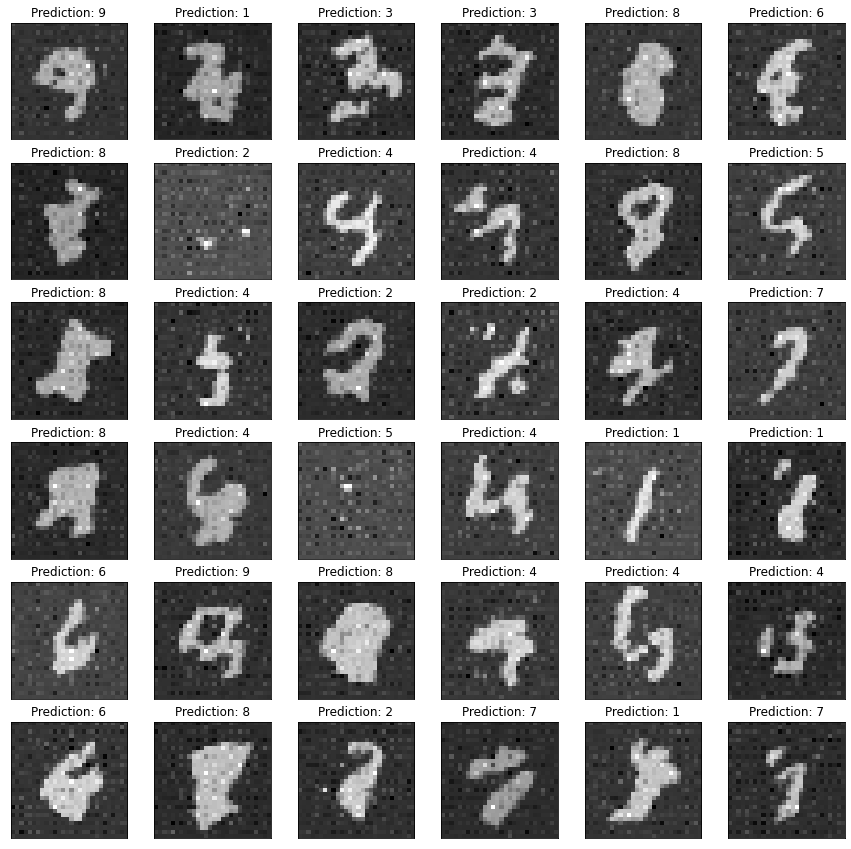

In [108]:

fig, axes = plt.subplots(6,6, figsize=(15,15))


for i, ax in enumerate(axes.ravel()):
  ax.imshow(ddemo[i][0], cmap='gray', interpolation='none')
  ax.set_title(f"Prediction: {output.data.max(1, keepdim=True)[1][i].item()}")
  ax.set_xticks([])
  ax.set_yticks([])
fig.savefig("figs/predictions.png", dpi = 100)

In [105]:


output.data.abs().log()

tensor([[ 1.8791,  1.6885,  1.7243,  1.3821,  0.7340,  1.4822,  1.9677,  1.0332,
          1.1740, -1.1767],
        [ 1.0725,  0.4165,  0.5170,  0.9599,  0.9213,  1.1705,  0.7447,  1.0960,
          0.7250,  1.1193],
        [ 1.5123,  0.8472,  1.0637, -0.6547,  1.4564,  1.1900,  1.7287,  0.9611,
          1.0160,  1.0881],
        [ 1.5709,  1.0589,  0.6667, -0.1859,  1.4657,  1.4558,  1.9276,  0.6699,
          0.8036,  0.9235],
        [ 0.9724,  0.8043,  1.0090,  0.8758,  1.1301,  0.9958,  0.9397,  1.2242,
          0.0534,  0.8517],
        [ 1.3082,  1.2140,  1.4786,  1.5424,  1.1638,  0.5676,  0.0429,  1.7664,
          0.1857,  1.0838],
        [ 1.1490,  0.5680,  0.8662,  0.9981,  1.2481,  1.1218,  1.1506,  1.1469,
         -0.1318,  1.1084],
        [ 0.8004,  0.7697,  0.6331,  0.8509,  0.8595,  0.9491,  0.7264,  0.9681,
          0.9445,  0.9075],
        [ 1.9687,  1.6243,  1.7250,  1.4184, -0.6246,  1.2864,  1.6988,  1.4315,
          1.1592,  0.1846],
        [ 1.6180,  

In [31]:

example_data.shape

torch.Size([1000, 1, 28, 28])